In [1]:
import sys
sys.version

import exoplanet
print(f"exoplanet.__version__ = '{exoplanet.__version__}'")



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm
import pymc3_ext as pmx
from astropy import units as u
from astropy.constants import M_earth, M_sun
from simulate import *
from model import *
import pickle
from collections import defaultdict

import matplotlib 
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)


exoplanet.__version__ = '0.5.1'


In [202]:
folder = './code_tests/traces/Nov18/'

'''
files = [
    'period1000_inc10_gaia60_roman5.pkl',
    'period1000_inc10_gaia60_roman10.pkl',
    'period1000_inc10_gaia60_roman20.pkl',
    'period1000_inc10_gaia60_romanNA.pkl',
    'period1000_inc45_gaia60_roman5.pkl',
    'period1000_inc45_gaia60_roman10.pkl',
    'period1000_inc45_gaia60_roman20.pkl',
    'period1000_inc45_gaia60_romanNA.pkl',
    'period1000_inc80_gaia60_roman5.pkl',
    'period1000_inc80_gaia60_roman10.pkl',
    'period1000_inc80_gaia60_roman20.pkl',
    'period1000_inc80_gaia60_romanNA.pkl',
    'period4327_inc10_gaia60_roman5.pkl',
    'period4327_inc10_gaia60_roman10.pkl',
    'period4327_inc10_gaia60_roman20.pkl',
    'period4327_inc10_gaia60_romanNA.pkl',
    'period4327_inc45_gaia60_roman5.pkl',
    'period4327_inc45_gaia60_roman10.pkl',
    'period4327_inc45_gaia60_roman20.pkl',
    'period4327_inc45_gaia60_romanNA.pkl',
    'period4327_inc80_gaia60_roman5.pkl',
    'period4327_inc80_gaia60_roman10.pkl',
    'period4327_inc80_gaia60_roman20.pkl',
    'period4327_inc80_gaia60_romanNA.pkl',
    'period10000_inc10_gaia60_roman5.pkl',
    'period10000_inc10_gaia60_roman10.pkl',
    'period10000_inc10_gaia60_roman20.pkl',
    'period10000_inc10_gaia60_romanNA.pkl',
    'period10000_inc45_gaia60_roman5.pkl',
    'period10000_inc45_gaia60_roman10.pkl',
    'period10000_inc45_gaia60_roman20.pkl',
    'period10000_inc45_gaia60_romanNA.pkl',
    'period10000_inc80_gaia60_roman5.pkl',
    'period10000_inc80_gaia60_roman10.pkl',
    'period10000_inc80_gaia60_roman20.pkl',
    'period10000_inc80_gaia60_romanNA.pkl'
]
'''

files = [
'period4327_inc45_gaia60_romanNA.pkl',
'period4327_inc45_gaia60_romanNA.pkl',
'period4327_inc45_gaia60_roman20_10_2x.pkl',
'period4327_inc45_gaia60_roman20_5_2x.pkl',
'period4327_inc45_gaia60_roman10_10_2x.pkl',
'period4327_inc45_gaia60_roman10_5_2x.pkl',
'period4327_inc45_gaia60_roman5_10_2x.pkl',
'period4327_inc45_gaia60_roman5_5_2x.pkl'
]


'''
files = [
'period4327_inc45_gaia60_romanNA.pkl',
'period4327_inc45_gaia60_romanNA.pkl',
'period4327_inc45_gaia60_roman20_10.pkl',
'period4327_inc45_gaia60_roman20_5.pkl',
'period4327_inc45_gaia60_roman10_10.pkl',
'period4327_inc45_gaia60_roman10_5.pkl',
'period4327_inc45_gaia60_roman5_10.pkl',
'period4327_inc45_gaia60_roman5_5.pkl'
]
'''





    



"\nfiles = [\n'period4327_inc45_gaia60_romanNA.pkl',\n'period4327_inc45_gaia60_romanNA.pkl',\n'period4327_inc45_gaia60_roman20_10.pkl',\n'period4327_inc45_gaia60_roman20_5.pkl',\n'period4327_inc45_gaia60_roman10_10.pkl',\n'period4327_inc45_gaia60_roman10_5.pkl',\n'period4327_inc45_gaia60_roman5_10.pkl',\n'period4327_inc45_gaia60_roman5_5.pkl'\n]\n"

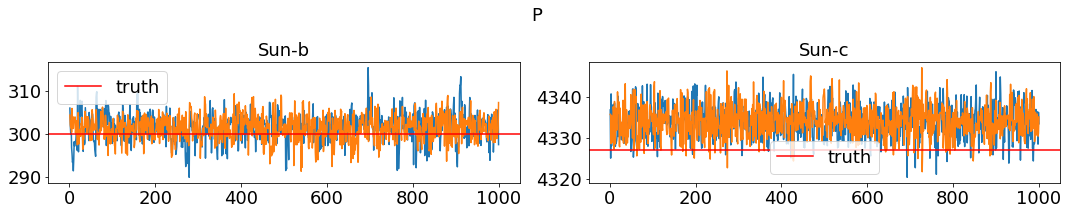

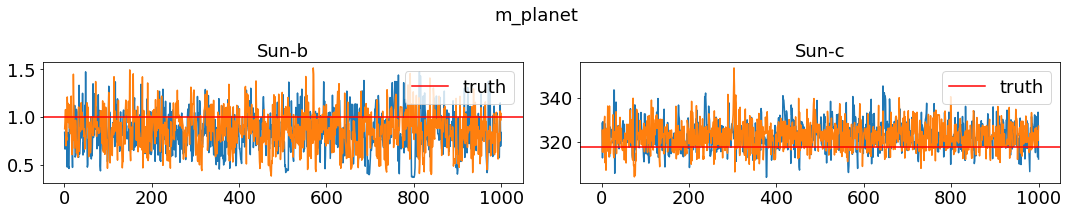

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

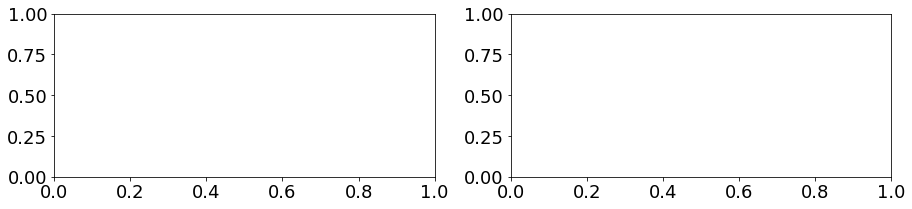

In [203]:


with open(folder+files[0], 'rb') as buff:
    data = pickle.load(buff)  
    
    model, trace = data['model'], data['trace']


parameters = ["P", "m_planet", "incl"]

m_sun = 333030 #earth masses

P_earth = 300
e_earth = 0.0167
Tper_earth= 100
omega_earth = np.radians(102.9)
Omega_earth = np.radians(0.0)
inclination_earth = np.radians(inc_earth)
m_earth = 1./m_sun #units m_sun


P_jup = 4327
e_jup = 0.0484
Tper_jup = 500
omega_jup = np.radians(274.3) - 2*np.pi
Omega_jup = np.radians(100.4)
inclination_jup = np.radians(1.31) + inclination_earth
m_jup = 317.83/m_sun #units m_sun



truth_chain_plot = [P_earth, P_jup, m_earth*m_sun, m_jup*m_sun, inclination_earth, inclination_jup]
for ii in range(0, len(parameters)):
    plot_truth = False
    param = parameters[ii]
    
    true_vals_earth = truth_chain_plot[2*ii]
    true_vals_jup = truth_chain_plot[2*ii+1]
    plot_truth = True
    
    fig, ax = plt.subplots(1,2, figsize = (15,3))
    planet1_chain1 = trace.posterior[param].values[:, :, 0][0]
    planet1_chain2 = trace.posterior[param].values[:, :, 0][1]
    
    planet2_chain1 = trace.posterior[param].values[:, :, 1][0]
    planet2_chain2 = trace.posterior[param].values[:, :, 1][1]
    
    
    nstep = np.arange(1, len(planet1_chain1)+1, 1)
    
    
    ax[0].plot(nstep, planet1_chain1)
    ax[0].plot(nstep, planet1_chain2)
    
    if plot_truth:
        ax[0].axhline(y=true_vals_earth, color = 'r', label = 'truth')
    ax[0].set_title("Sun-b", fontsize = 18)
    ax[0].legend(fontsize = 18)
    
    ax[1].plot(nstep, planet2_chain1)
    ax[1].plot(nstep, planet2_chain2)
    
    if plot_truth:
        ax[1].axhline(y=true_vals_jup, color = 'r', label = 'truth')
    ax[1].set_title("Sun-c", fontsize = 18)
    ax[1].legend(fontsize = 18)

    fig.suptitle(param, fontsize = 18)
    fig.tight_layout()
    plt.show()

In [206]:
#periods = [1000., 4327.631, 10000.]
#incs = [10., 45., 80.]
#roman_errs = [5e-6, 10e-6, 20e-6, None]

periods = [4327]
incs = [45.]
roman_errs = [None, 20e-6, 10e-6, 5e-6]
roman_durations = [10, 5]


index = -1
params_earth = defaultdict(list)
params_jup = defaultdict(list)
params_earth_err = defaultdict(list)
params_jup_err = defaultdict(list)
for period_jup in periods:
    for inc_earth in incs:
        for roman_err in roman_errs:
            for roman_duration in roman_durations:
                index += 1
                file = files[index]




                with open(folder+file, 'rb') as buff:
                    data = pickle.load(buff)  

                model, trace = data['model'], data['trace']

                parameters = ["m_planet", "P"]

                #print("")
                #print("true values:")
                #print("Jupiter period = " + str(period_jup))
                #print("Earth inclindation = " + str(np.radians(inc_earth)))
                #print("")

                print("")
                print("")
                print("")
                print(file)
                for param in parameters:


                    planet1_med = np.median(trace.posterior[param].values[:, :, 0])
                    planet2_med = np.median(trace.posterior[param].values[:, :, 1])

                    planet1_quantile = [np.quantile(trace.posterior[param].values[:, :, 0], 0.16),
                                        np.quantile(trace.posterior[param].values[:, :, 0], 0.84)]
                    
                    planet2_quantile = [np.quantile(trace.posterior[param].values[:, :, 1], 0.16),
                                        np.quantile(trace.posterior[param].values[:, :, 1], 0.84)]

                    planet1_err = np.array([
                        [planet1_med - planet1_quantile[0]  ],
                        [planet1_quantile[1] - planet1_med]
                    ])
                    
                    planet2_err = np.array([
                        [planet2_med - planet2_quantile[0]  ],
                        [planet2_quantile[1] - planet2_med]
                    ])
                    
                    print(param + "_earth: " + str(planet1_med) + " -/+ " + str(planet1_err))
                    print(param + "_jup: " + str(planet2_med) + "-/+" + str(planet2_err))

                    params_earth[param].append(planet1_med)
                    params_jup[param].append(planet2_med)

                    params_earth_err[param].append(planet1_err)
                    params_jup_err[param].append(planet2_err)

                    print("")

        
        
        





period4327_inc45_gaia60_romanNA.pkl
m_planet_earth: 0.8462341924396962 -/+ [[0.20700382]
 [0.20880119]]
m_planet_jup: 322.592487588223-/+[[5.87238391]
 [6.44069343]]

P_earth: 301.5049876966899 -/+ [[2.95431493]
 [2.72211973]]
P_jup: 4334.087930003387-/+[[4.05753625]
 [3.82489181]]




period4327_inc45_gaia60_romanNA.pkl
m_planet_earth: 0.8462341924396962 -/+ [[0.20700382]
 [0.20880119]]
m_planet_jup: 322.592487588223-/+[[5.87238391]
 [6.44069343]]

P_earth: 301.5049876966899 -/+ [[2.95431493]
 [2.72211973]]
P_jup: 4334.087930003387-/+[[4.05753625]
 [3.82489181]]




period4327_inc45_gaia60_roman20_10_2x.pkl
m_planet_earth: 0.7566142874069124 -/+ [[0.19874352]
 [0.17422403]]
m_planet_jup: 315.53678321749294-/+[[2.63489812]
 [2.87257411]]

P_earth: 301.29341182590616 -/+ [[3.08553842]
 [2.84862068]]
P_jup: 4324.882832450703-/+[[2.86483633]
 [2.8552955 ]]




period4327_inc45_gaia60_roman20_5_2x.pkl
m_planet_earth: 0.8109393858864673 -/+ [[0.20036048]
 [0.20089968]]
m_planet_jup: 314.

In [207]:
from pylab import *

cmap = cm.get_cmap('winter', len(files))    # PiYG

colors = []
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    colors.append(matplotlib.colors.rgb2hex(rgba))
    
    
ys = np.linspace(1, 0, len(files))


In [208]:
colors = [
    "#1c245f", "#1c245f", 
    "#530031", "#530031", 
    "#ffc052", "#ffc052", 
    "#01792d", "#01792d"]

<ipython-input-209-22b0bf73de5b>:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


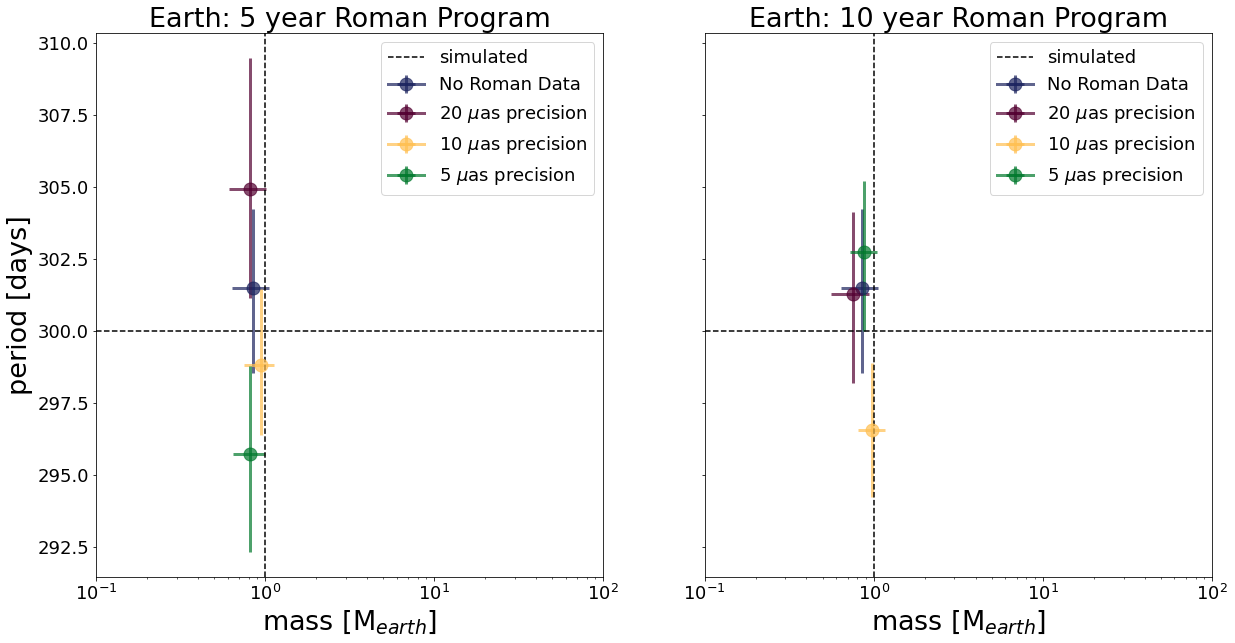

In [209]:


xs = params_earth['m_planet']
xs_err = params_earth_err['m_planet']

ys = params_earth['P']
ys_err = params_earth_err['P']

roman_errs_double = ['No Roman Data', 'No Roman Data', 
                     r'20 $\mu$as precision', r'20 $\mu$as precision', 
                     r'10 $\mu$as precision', r'10 $\mu$as precision', 
                     r'5 $\mu$as precision', r'5 $\mu$as precision']


fig, axs = plt.subplots(1, 2, figsize=[20, 10], sharey=True)

    
xmin = .1
xmax = 100

for ii in range(0, len(files)):    
    x = xs[ii]
    x_err = xs_err[ii]
    y = ys[ii]
    y_err = ys_err[ii]
    
    roman_err = roman_errs_double[ii]
    color = colors[ii]
    if ii % 2 == 0:
        axs[1].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
    
    else:
        axs[0].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
        
    

axs[0].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[1].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')

axs[0].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')
axs[1].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')

axs[0].set_xlim(xmin,xmax)
axs[1].set_xlim(xmin,xmax)

#axs[0].set_ylim(290, 310)

axs[0].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[0].set_ylabel(r'period [days]', fontsize = 27)

axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[0].set_title('Earth: 5 year Roman Program', fontsize = 27)
axs[1].set_title('Earth: 10 year Roman Program', fontsize = 27)

axs[0].legend(fontsize = 18, loc=1)
axs[1].legend(fontsize = 18, loc=1)



fig.show()
#fig.savefig('./final_figures/MvP_earth2.pdf')



<ipython-input-210-43d1e31ff4f3>:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


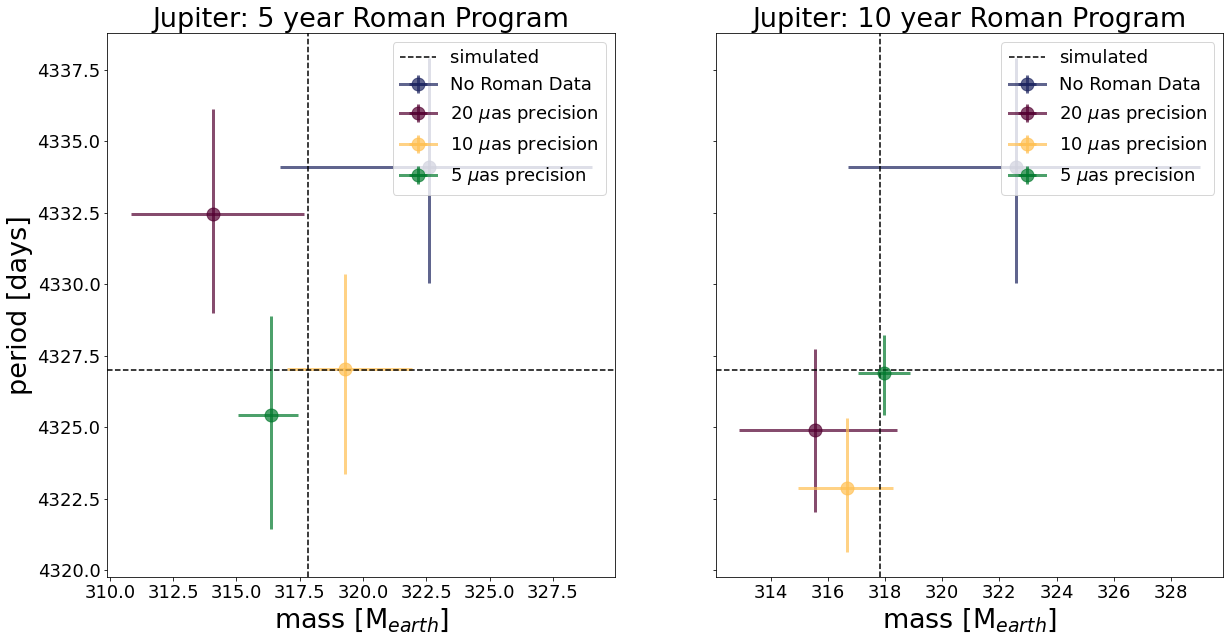

In [210]:


xs = params_jup['m_planet']
xs_err = params_jup_err['m_planet']

ys = params_jup['P']
ys_err = params_jup_err['P']


roman_errs_double = ['No Roman Data', 'No Roman Data', 
                     r'20 $\mu$as precision', r'20 $\mu$as precision', 
                     r'10 $\mu$as precision', r'10 $\mu$as precision', 
                     r'5 $\mu$as precision', r'5 $\mu$as precision']

fig, axs = plt.subplots(1, 2, figsize=[20, 10], sharey=True)

    
    


for ii in range(0, len(files)):    
    x = xs[ii]
    x_err = xs_err[ii]
    y = ys[ii]
    y_err = ys_err[ii]
    
    roman_err = roman_errs_double[ii]
    color = colors[ii]
    if ii % 2 == 0:
        axs[1].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
    
    else:
        axs[0].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
        
    

axs[0].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated ')
axs[1].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')

axs[0].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')
axs[1].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')

#axs[0].set_xlim(xmin,xmax)
#axs[1].set_xlim(xmin,xmax)

axs[0].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[0].set_ylabel(r'period [days]', fontsize = 27)



axs[0].set_title('Jupiter: 5 year Roman Program', fontsize = 27)
axs[1].set_title('Jupiter: 10 year Roman Program', fontsize = 27)

axs[0].legend(fontsize = 18, loc=1)
axs[1].legend(fontsize = 18, loc=1)



fig.show()
#fig.savefig('./final_figures/MvP_jupiter2.pdf')


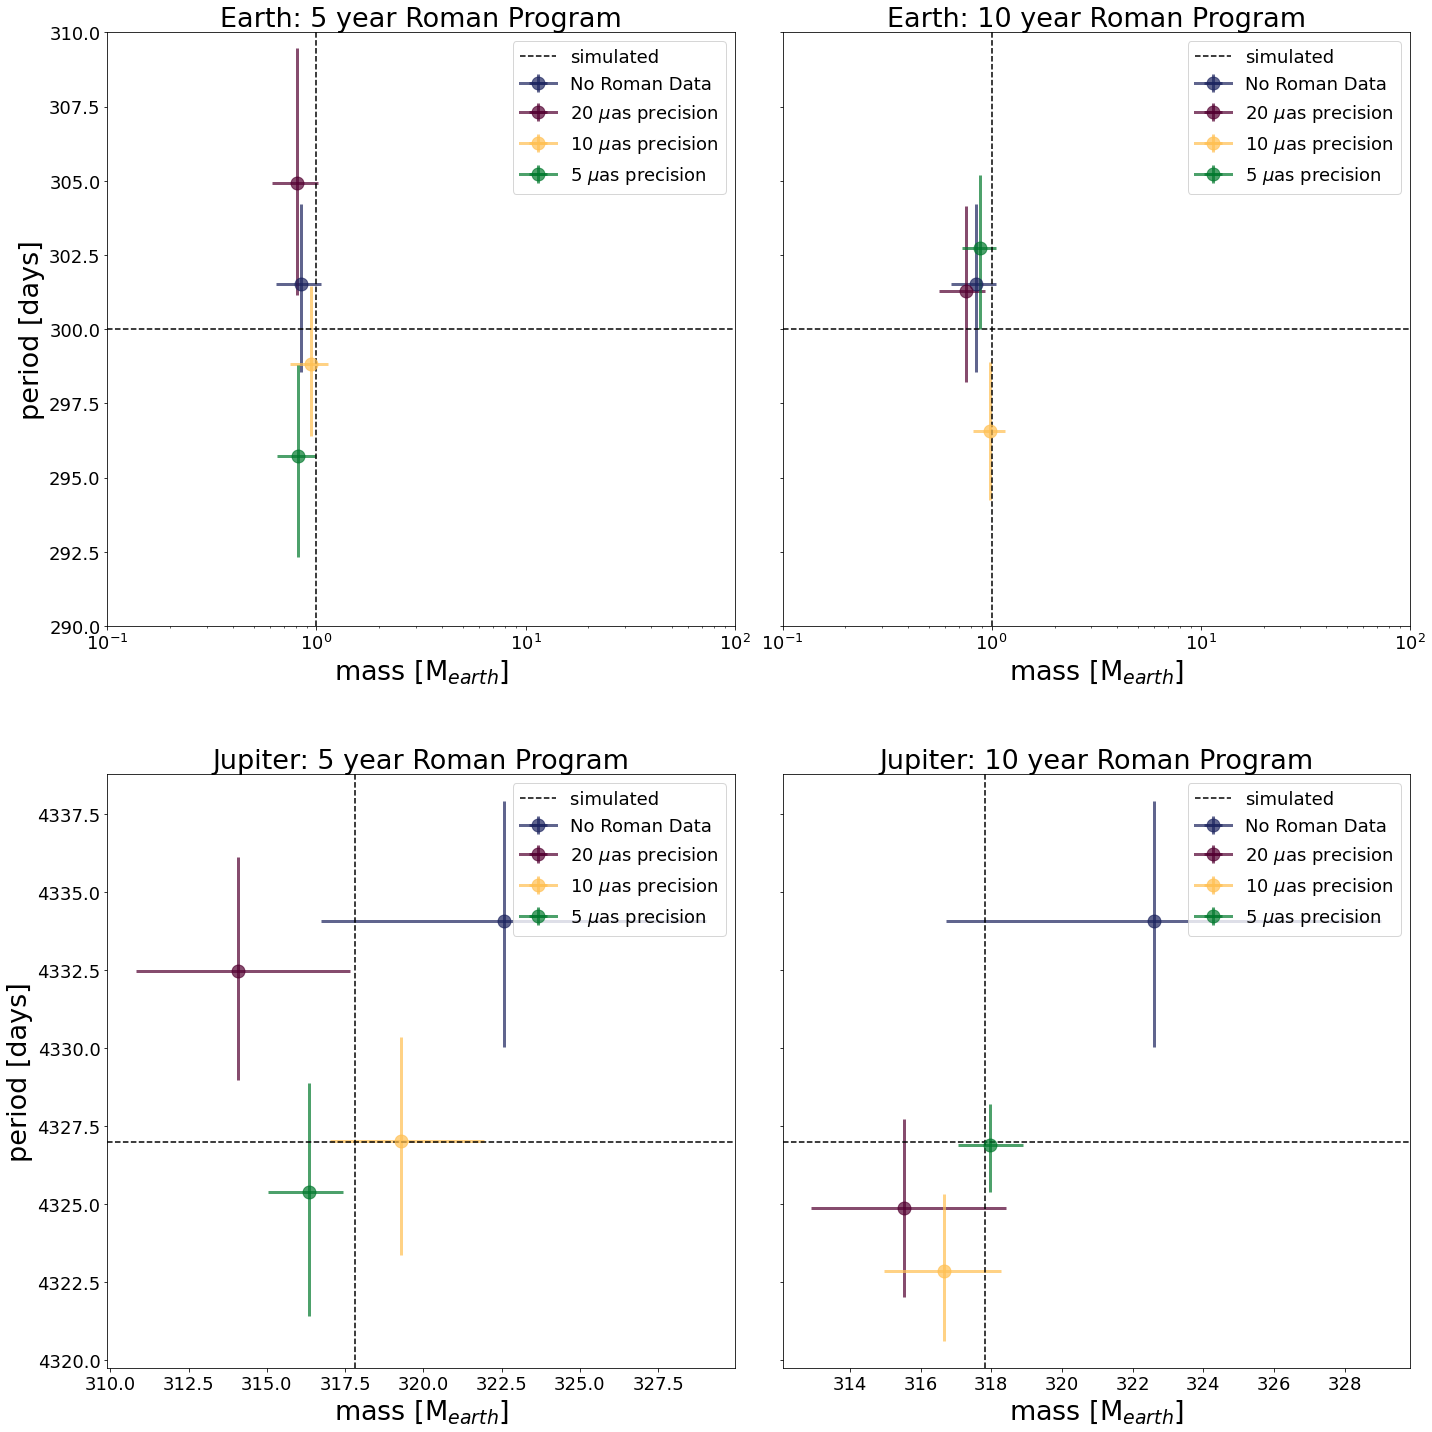

In [211]:

xs = params_earth['m_planet']
xs_err = params_earth_err['m_planet']

ys = params_earth['P']
ys_err = params_earth_err['P']

roman_errs_double = ['No Roman Data', 'No Roman Data', 
                     r'20 $\mu$as precision', r'20 $\mu$as precision', 
                     r'10 $\mu$as precision', r'10 $\mu$as precision', 
                     r'5 $\mu$as precision', r'5 $\mu$as precision']


fig, axs = plt.subplots(2, 2, figsize=[20, 20], sharey='row')

    
xmin = .1
xmax = 100

for ii in range(0, len(files)):    
    x = xs[ii]
    x_err = xs_err[ii]
    y = ys[ii]
    y_err = ys_err[ii]
    
    roman_err = roman_errs_double[ii]
    color = colors[ii]
    if ii % 2 == 0:
        axs[0][1].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
    
    else:
        axs[0][0].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
        
    
axs[0][0].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[0][1].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')

axs[0][0].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')
axs[0][1].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')

axs[0][0].set_xlim(xmin,xmax)
axs[0][1].set_xlim(xmin,xmax)

axs[0][0].set_ylim(290, 310)

axs[0][0].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[0][1].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[0][0].set_ylabel(r'period [days]', fontsize = 27)

axs[0][0].set_xscale('log')
axs[0][1].set_xscale('log')

axs[0][0].set_title('Earth: 5 year Roman Program', fontsize = 27)
axs[0][1].set_title('Earth: 10 year Roman Program', fontsize = 27)

axs[0][0].legend(fontsize = 18, loc=1)
axs[0][1].legend(fontsize = 18, loc=1)


















xs = params_jup['m_planet']
xs_err = params_jup_err['m_planet']

ys = params_jup['P']
ys_err = params_jup_err['P']


roman_errs_double = ['No Roman Data', 'No Roman Data', 
                     r'20 $\mu$as precision', r'20 $\mu$as precision', 
                     r'10 $\mu$as precision', r'10 $\mu$as precision', 
                     r'5 $\mu$as precision', r'5 $\mu$as precision']


    
    


for ii in range(0, len(files)):    
    x = xs[ii]
    x_err = xs_err[ii]
    y = ys[ii]
    y_err = ys_err[ii]
    
    roman_err = roman_errs_double[ii]
    color = colors[ii]
    if ii % 2 == 0:
        axs[1][1].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
    
    else:
        axs[1][0].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
        
    

axs[1][0].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated ')
axs[1][1].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')

axs[1][0].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')
axs[1][1].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')



axs[1][0].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1][1].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1][0].set_ylabel(r'period [days]', fontsize = 27)



axs[1][0].set_title('Jupiter: 5 year Roman Program', fontsize = 27)
axs[1][1].set_title('Jupiter: 10 year Roman Program', fontsize = 27)

axs[1][0].legend(fontsize = 18, loc=1)
axs[1][1].legend(fontsize = 18, loc=1)

fig.tight_layout()
plt.subplots_adjust(hspace=0.25)

#fig.savefig("./final_figures/mass_vs_period.pdf")


./traces/Sep22/period4327_inc45_gaia60_roman5_10.pkl
./traces/Oct27/period4327_inc45_gaia60_roman5_10.pkl
./traces/Nov9/2Me_period4327_inc45_gaia60_roman5_10.pkl
./traces/Nov10/4Me_period4327_inc45_gaia60_roman5_10.pkl
./traces/Nov11/3Me_period4327_inc45_gaia60_roman5_10.pkl


In [174]:
def plot_comparison_masses(folders, filenames, roman_precision, roman_duration):
    earth_mass = [1., 1., 2., 4., 3.]
    periods = [4327]
    incs = [45.]
    roman_errs = [roman_precision]
    roman_durations = [roman_duration]


    params_earth = defaultdict(list)
    params_jup = defaultdict(list)
    params_earth_err = defaultdict(list)
    params_jup_err = defaultdict(list)
    for ii in range(0, len(folders)):
        index = -1
        files = filenames[ii]
        folder = folders[ii]
        for period_jup in periods:
            for inc_earth in incs:
                for roman_err in roman_errs:
                    for roman_duration in roman_durations:
                        index += 1
                        file = files[index]




                        with open(folder+file, 'rb') as buff:
                            data = pickle.load(buff)  

                        model, trace = data['model'], data['trace']

                        parameters = ["m_planet", "P"]

                        #print("")
                        #print("true values:")
                        #print("Jupiter period = " + str(period_jup))
                        #print("Earth inclindation = " + str(np.radians(inc_earth)))
                        #print("")


                        print(folder+file)
                        for param in parameters:


                            planet1_med = np.median(trace.posterior[param].values[:, :, 0])
                            planet2_med = np.median(trace.posterior[param].values[:, :, 1])

                            planet1_quantile = [np.quantile(trace.posterior[param].values[:, :, 0], 0.16),
                                                np.quantile(trace.posterior[param].values[:, :, 0], 0.84)]

                            planet2_quantile = [np.quantile(trace.posterior[param].values[:, :, 1], 0.16),
                                                np.quantile(trace.posterior[param].values[:, :, 1], 0.84)]

                            planet1_err = np.array([
                                [planet1_med - planet1_quantile[0]  ],
                                [planet1_quantile[1] - planet1_med]
                            ])

                            planet2_err = np.array([
                                [planet2_med - planet2_quantile[0]  ],
                                [planet2_quantile[1] - planet2_med]
                            ])



                            params_earth[param].append(planet1_med)
                            params_jup[param].append(planet2_med)

                            params_earth_err[param].append(planet1_err)
                            params_jup_err[param].append(planet2_err)








    ####################################################################################
    ####################################################################################
    ############################  plot   ###############################################
    ####################################################################################
    ####################################################################################



    xs = params_earth['m_planet']
    xs_err = params_earth_err['m_planet']

    print(xs)

    ys = params_earth['P']
    ys_err = params_earth_err['P']

    roman_errs_double = ['No Roman Data', 'No Roman Data', 
                         r'20 $\mu$as precision', r'20 $\mu$as precision', 
                         r'10 $\mu$as precision', r'10 $\mu$as precision', 
                         r'5 $\mu$as precision', r'5 $\mu$as precision']


    fig, axs = plt.subplots(1, 1, figsize=[18, 13], sharey=True)


    colors = [
        "#1c245f", 
        "#530031", 
        "#ffc052", 
        "#01792d",
        "#777acd"
    ]



    index = -1
    masses = [1, 1, 2, 4, 3]
    for ii in range(0, len(folders)):
        mass = masses[ii]
        for jj in range(0, len(files)):    
            index += 1

            x = xs[index]
            x_err = xs_err[index]
            y = ys[index]
            y_err = ys_err[index]

            roman_err = roman_errs_double[jj]
            color = colors[ii]

            axs.errorbar(x-mass, y-300, xerr=x_err, yerr = y_err, marker = 'o', 
                                color = color, label = r'M$_E$ = ' + str(int(earth_mass[ii])) + 'M$_E$', 
                                markersize=13, linewidth = 3, alpha = 0.7)

    axs.axvline(x=0, ymin=0, ymax=1, ls = '--', color = 'k')

    
    axs.axhline(y=0, xmin=0, xmax=1, color = 'k', ls = '--')

    #axs.set_ylim(np.min(ys)*.99-300, np.max(ys)*1.01-300)
    axs.set_ylim(-5, 5)
    axs.set_xlim(-2, 10)

    axs.set_xlabel(r'mass residual [M$_{earth}$]', fontsize = 27)
    axs.set_ylabel(r'period residual [days]', fontsize = 27)

    #axs.set_xscale('log')
    
    
    if roman_duration != None:
        axs.set_title(r'Earth: ' + str(int(roman_precision*1e6)) + '$\mu$as Precision, ' + str(int(roman_duration)) + ' year Roman Program', fontsize = 27)
        #fig.savefig('final_figures/compare_masses/' + str(int(roman_precision*1e6)) + 'microas' + str(int(roman_duration)) + 'yrs.pdf')
    else:
        axs.set_title(r'Earth: No Roman', fontsize = 27)
        #fig.savefig('final_figures/compare_masses/no_roman.pdf')

    axs.legend(fontsize = 18, loc=1)


    fig.show()

./traces/Sep22/period4327_inc45_gaia60_romanNA.pkl
./traces/Oct27/period4327_inc45_gaia60_romanNA.pkl
./traces/Nov9/2Me_period4327_inc45_gaia60_romanNA.pkl
./traces/Nov10/4Me_period4327_inc45_gaia60_romanNA.pkl
./traces/Nov11/3Me_period4327_inc45_gaia60_romanNA.pkl
[4.524990623708748, 15.96925320314125, 6.144337480467802, 6.097244296370415, 5.020539417874043]


<ipython-input-174-90af5aa80980>:158: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


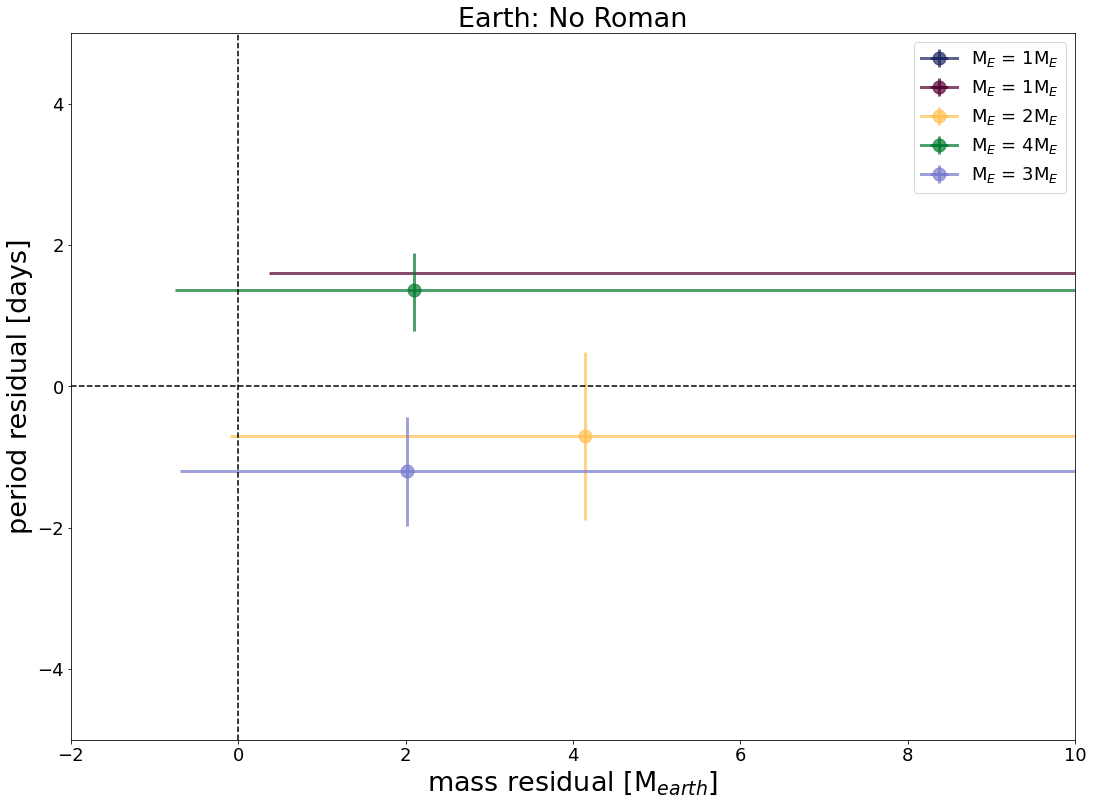

In [178]:
folders = [
    './traces/Sep22/',
    './traces/Oct27/',
    './traces/Nov9/',
    './traces/Nov10/',
    './traces/Nov11/'
]

filenames = [[
    'period4327_inc45_gaia60_romanNA.pkl'
],
[
    'period4327_inc45_gaia60_romanNA.pkl'
],
[
    '2Me_period4327_inc45_gaia60_romanNA.pkl',
],
[
    '4Me_period4327_inc45_gaia60_romanNA.pkl',
],
[
    '3Me_period4327_inc45_gaia60_romanNA.pkl',
]]

plot_comparison_masses(folders, filenames, None, None)